# Training Notebook For Cardiac Arrhythmia
- This notebook is intended for training and saving the *model weights* for [**Cardiac Arrhythmia Detection**](https://github.com/akash-selvaraj/ECG-Based-Cardiac-Arrhythmia-Prediction)
- Run this in [**Google Colab**](https://colab.research.google.com/) with **Google Drive** mounted for the **model weights** to be saved.

## Imports

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## Dataset Download

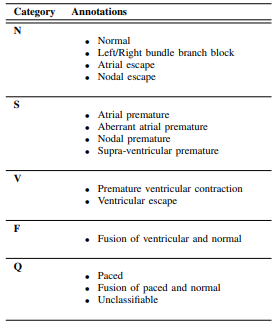

In [ ]:
!curl -L -o ~/archive.zip https://www.kaggle.com/api/v1/datasets/download/erhmrai/ecg-image-data


!unzip ~/archive.zip -d /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V1869.png  
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V187.png  
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V1870.png  
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V1871.png  
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V1872.png  
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V1874.png  
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V1877.png  
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V1879.png  
  inflating: /content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train/V/V188.png  
  inflating: /content/dr

In [ ]:
train_path = '/content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/train'
valid_path = '/content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/test'

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define image size
IMAGE_SIZE = (224, 224)

# Create ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for your specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(6, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)
model.summary()
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,113,798 (91.99 MB)

 Trainable params: 526,086 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

# Define limits and batch size
train_class_limit = 500  # Limit for training images per class
val_class_limit = 30    # Limit for validation images per class
batch_size = 32

# Temporary directories for filtered data
filtered_train_path = 'filtered_training_data2'
filtered_valid_path = 'filtered_validation_data2'

# Ensure temporary directories are fresh
for path in [filtered_train_path, filtered_valid_path]:
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)

# Function to limit images in a directory based on a given limit
def limit_images_in_directory(src_path, dest_path, limit):
    for class_name in os.listdir(src_path):
        class_dir = os.path.join(src_path, class_name)
        if os.path.isdir(class_dir):
            os.makedirs(os.path.join(dest_path, class_name), exist_ok=True)

            # Get all images in the class directory and limit them
            images = os.listdir(class_dir)
            limited_images = images[:limit] if len(images) > limit else images

            for img in limited_images:
                src_path_img = os.path.join(class_dir, img)
                dest_path_img = os.path.join(dest_path, class_name, img)
                shutil.copyfile(src_path_img, dest_path_img)

# Limit images in training and validation directories
limit_images_in_directory(train_path, filtered_train_path, train_class_limit)
limit_images_in_directory(valid_path, filtered_valid_path, val_class_limit)

# Initialize data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    filtered_train_path,
    target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    filtered_valid_path,
    target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print("Training images per class:", train_generator.class_indices)
print("Validation images per class:", valid_generator.class_indices)


Found 3000 images belonging to 6 classes.
Found 180 images belonging to 6 classes.
Training images per class: {'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}
Validation images per class: {'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}


In [ ]:
print("Number of training images:", train_generator.samples)
print("Number of validation images:", valid_generator.samples)


Number of training images: 3000
Number of validation images: 180


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
total_classes = len(train_generator.class_indices)
class_limit = train_class_limit
steps_per_epoch_train = (class_limit * total_classes) // batch_size

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch_train,
                    epochs=50,
                    validation_data=valid_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


93/93 ━━━━━━━━━━━━━━━━━━━━ 78s 799ms/step - accuracy: 0.7903 - loss: 0.5548 - val_accuracy: 0.7722 - val_loss: 0.5247
Epoch 2/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9688 - loss: 0.2968

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.2968 - val_accuracy: 0.7944 - val_loss: 0.5115
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 67s 671ms/step - accuracy: 0.8365 - loss: 0.4576 - val_accuracy: 0.7611 - val_loss: 0.5470
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7188 - loss: 0.5333 - val_accuracy: 0.7889 - val_loss: 0.5101
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 83s 685ms/step - accuracy: 0.8814 - loss: 0.3558 - val_accuracy: 0.7278 - val_loss: 0.5536
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9688 - loss: 0.1899 - val_accuracy: 0.7778 - val_loss: 0.5537
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 78s 679ms/step - accuracy: 0.8904 - loss: 0.3370 - val_accuracy: 0.8167 - val_loss: 0.4787
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9375 - loss: 0.2641 - val_accuracy: 0.8389 - val_loss: 0.4237
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 69s 671ms/step - accuracy: 0.8910 - loss: 0.3320 - val_accuracy: 0.8389 - val_

In [ ]:
model.save('/content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/trained_model/resnet50_model2.keras')

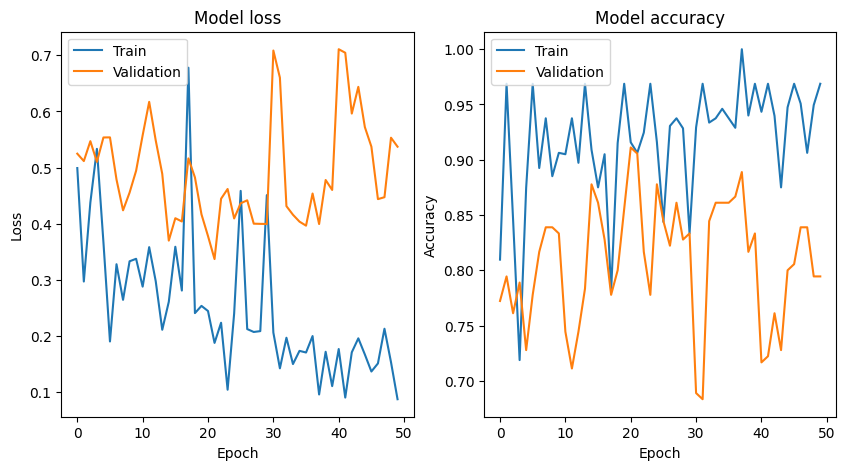

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 980ms/step
Confusion Matrix
[[21  0  0  0  4  5]
 [ 0 30  0  0  0  0]
 [ 0  0 26  4  0  0]
 [ 0  0  0 30  0  0]
 [ 0 13  0  0 17  0]
 [ 0  0  0  0 11 19]]


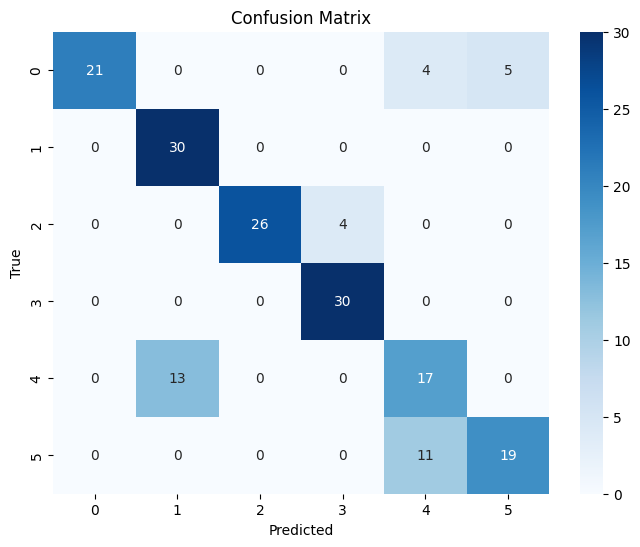

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict on the validation set
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')

y_true = valid_generator.classes


cm = confusion_matrix(y_true, y_pred)
print(cm)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('/content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/trained_model/resnet50_model.keras')

# Function to load and preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):  # Set target size to (224, 224)
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

img_path = '/content/drive/MyDrive/Cardiac_Arrhythmia_Mini_Project/ECG_Image_data/test/F/F113.png'
img_array = preprocess_image(img_path)

# Make prediction
prediction = model.predict(img_array)

predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: [5]


In [ ]:
train_generator.class_indices

{'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}